In [2]:
import numpy as np
import pandas as pd
from scipy import integrate
import math
import matplotlib.pyplot as plt
%matplotlib inline
%precision 4

'%.4f'

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

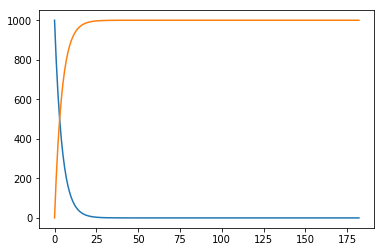

In [10]:
tau = 3.052
secs = 3*60 + 3
NThallium = 1000
NLead = 0
yThallium = []
yLead = []

def p(t):
    return 1-2**(-t/tau)

for i in range(secs):
    prob = p(i)
    frac = prob*NThallium
    yThallium.append(NThallium - frac)
    yLead.append(frac)

x = np.arange(secs)
yThallium = np.array(yThallium)
yLead = np.array(yLead)

plt.plot(x, yThallium)
plt.plot(x, yLead)
plt.show()

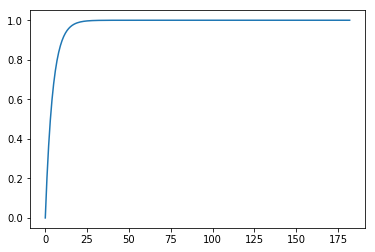

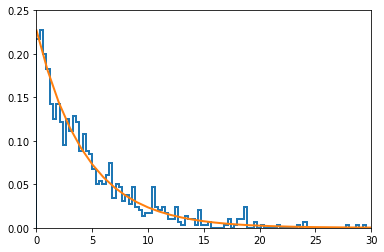

In [26]:
tau = 3.052
secs = 3*60 + 3

def p(t):
    return (2**(-t/tau))*(math.log(2)/tau)

def cdf(t):
    return 1 - 2**(-t/tau)

def icdf(p):
    return -tau*(np.log2(1 - p))

x = np.arange(secs)
plt.plot(x, cdf(x));
plt.show()

u = np.random.random(1000)
v = icdf(u)
plt.hist(v, histtype='step', bins=100, density=True, linewidth=2);
plt.plot(x, p(x), linewidth=2)
plt.axis([0,30,0,0.25])
plt.show()

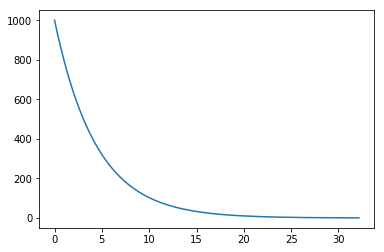

In [27]:
NThallium = 1000
yThallium = []
time = []
x = np.sort(np.random.uniform(0, 1, 1000))

for i in x:
    prob = i
    frac = prob*NThallium
    yThallium.append(NThallium - frac)
    time.append(icdf(i))
    
plt.plot(time, yThallium);

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [249]:
from math import pi

Z = 79
E = 1.233e-12
eps0 = 8.85e-24
e = -1.621e-19
a0 = 52.92
sigma = a0/100
N = 1000

mean = np.zeros(N)
cov = np.zeros(N)
for i in range(len(cov)):
    cov[i] = sigma
cov = np.diag(cov)
beam = np.random.multivariate_normal(mean, cov, N)

tans = (Z*(e**2))/(2*pi*eps0*E*b)

bounced_back = tans[tans > 1].shape[0]
print(bounced_back)

16570


## 3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [53]:
def f(x):
    return math.sin(1/(x*(2-x)))**2

trueI = integrate.quad(f, 0, 2)

I = []
for i in range(10):
    N = 10000
    count = 0
    for i in range(N):
        x = 2*np.random.random()
        y = np.random.random()
        if y < f(x): 
            count += 1
    I.append(2*count/N)

err = [abs(i - I[0]) for i in I]
print(np.mean(err))

C:\Users\Giovanni\Anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


0.010020000000000029


In [54]:
a = 2/N
I = 0

x = np.linspace(0.001, 1.999, N)

for i in x:
    I += a*f(i)
    
print(abs(I - trueI[0]))

0.00044419474470469567


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [260]:
N = 10000

def f(x, y):
    return x**2 + y**2

count = 0
for i in range(N):
    x = np.random.random()
    y = np.random.random()
    if f(x, y) <= 1: 
        count += 1
I = 4*count/N
print(I)

3.1604


In [270]:
def f(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10):
    return x1**2 + x2**2 + x3**2 + x4**2 + x5**2 + x6**2 + x7**2 + x8**2 + x9**2 + x10**2

count = 0
for i in range(N):
    x1 = np.random.random()
    x2 = np.random.random()
    x3 = np.random.random()
    x4 = np.random.random()
    x5 = np.random.random()
    x6 = np.random.random()
    x7 = np.random.random()
    x8 = np.random.random()
    x9 = np.random.random()
    x10 = np.random.random()
    if f(x1, x2, x3, x4, x5, x6, x7, x8, x9, x10) <= 1: 
        count += 1
I = 1000*count/N
print(I)

2.6


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [207]:
from math import exp

def w(x):
    return 1/np.sqrt(x)

def f(x):  
    return 1/(np.sqrt(x)*(np.exp(x) + 1))

N = 10000
x = np.linspace(0.0001, 1, N)

t = f(x)/w(x)
t = sum(t)

integral = integrate.quad(w, 0, 1)

I = (1/N)*t*integral[0]
print(I)

0.7597478803145642
